In [2]:
#Basic imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#Estimation of NH_instrinsic from HR and z

In [ ]:
#To make the teorical values of HR...

In [7]:
deli='./deliverables/'
orig='./originals/'
play='./playground/'

In [8]:
nh_all = ['teo_HR_20','teo_HR_205','teo_HR_21','teo_HR_215','teo_HR_22','teo_HR_225','teo_HR_23','teo_HR_235','teo_HR_24','teo_HR_245','teo_HR_25']
nh_nro = [1E20,5E20,1E21,5E21,1E22,5E22,1E23,5E23,1E24,5E24,1E25]

In [9]:
teo_HR_20,z = np.loadtxt(play+nh_all[0]+'.txt')
teo_HR_205  = np.loadtxt(play+nh_all[1]+'.txt')[0]
teo_HR_21   = np.loadtxt(play+nh_all[2]+'.txt')[0]
teo_HR_215  = np.loadtxt(play+nh_all[3]+'.txt')[0]
teo_HR_22   = np.loadtxt(play+nh_all[4]+'.txt')[0]
teo_HR_225  = np.loadtxt(play+nh_all[5]+'.txt')[0]
teo_HR_23   = np.loadtxt(play+nh_all[6]+'.txt')[0]
teo_HR_235  = np.loadtxt(play+nh_all[7]+'.txt')[0]
teo_HR_24   = np.loadtxt(play+nh_all[8]+'.txt')[0]
teo_HR_245  = np.loadtxt(play+nh_all[9]+'.txt')[0]
teo_HR_25   = np.loadtxt(play+nh_all[10]+'.txt')[0]

In [10]:
!cp ../02_Counterparts+Redshift/deliverables/Xses_zspec ./originals/Xses_zspec

In [11]:
#Astropy imports
from astropy.io import fits
from astropy.table import QTable

In [12]:
with fits.open(orig+'Xses_zspec', memmap=True) as hdul:
    #hdul.info()
    xses = QTable(hdul[1].data)

In [13]:
mask = []
for lines in xses['ID']:
    if 'xmm' in lines:
        mask.append(True)
    else:
        mask.append(False)

## Chandra correction

In [14]:
chandra = xses[np.logical_not(mask)]

In [15]:
import scipy.spatial.distance
i = 0
result=[]
for line in chandra['Z_Spec']:
    point = np.array([(chandra['Z_Spec'][i],chandra['HR'][i])])
    aux = []
    for nh in nh_all:
        aux.append(scipy.spatial.distance.cdist(point,np.column_stack((z, vars()[nh]))).min(axis=1))    
    aux=np.array(aux)
    result.append(nh_nro[aux.argmin()])
    i+=1

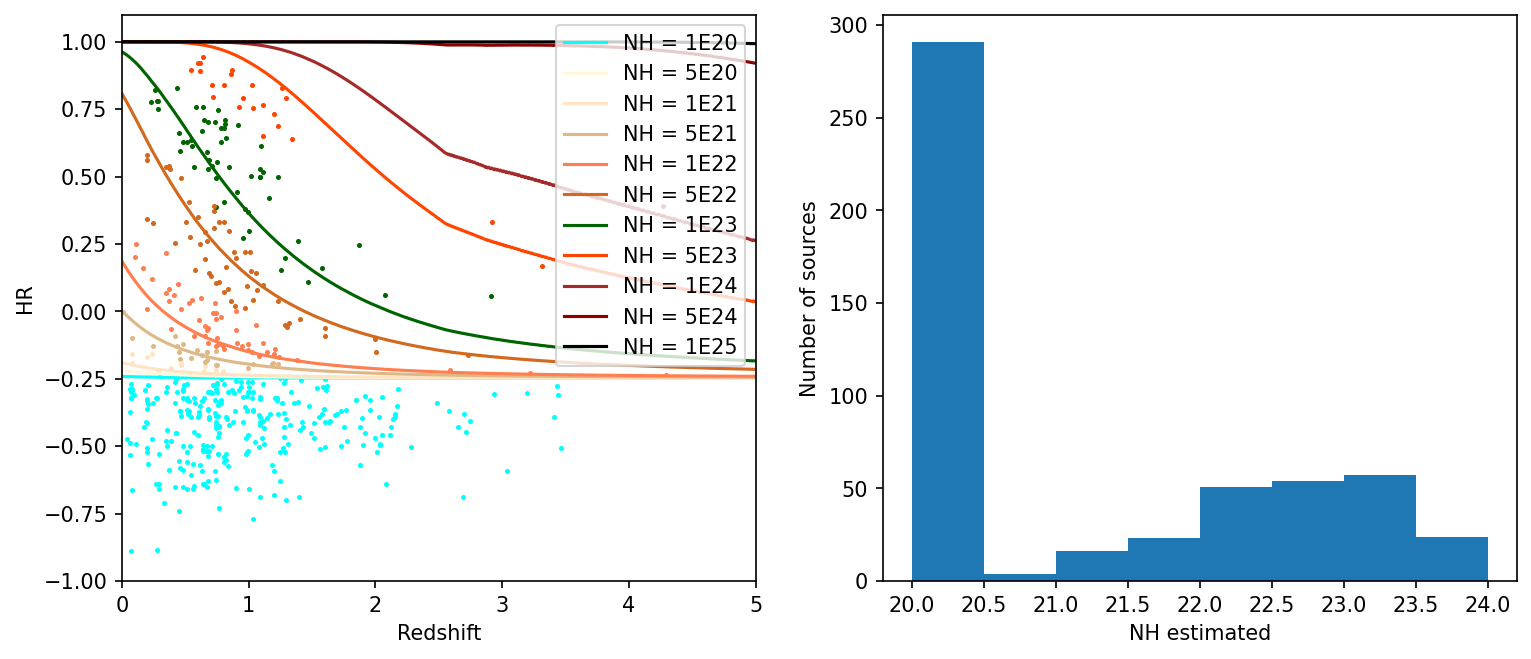

In [16]:
fig1 = plt.figure(figsize=(12, 5), dpi= 150)
sns.color_palette('dark')
ax1 = plt.subplot(121)
ax1.plot(z, teo_HR_20, label='NH = 1E20', color='cyan')
ax1.plot(z, teo_HR_205, label='NH = 5E20', color='cornsilk')
ax1.plot(z, teo_HR_21, label='NH = 1E21', color='bisque')
ax1.plot(z, teo_HR_215, label='NH = 5E21', color='burlywood')
ax1.plot(z, teo_HR_22, label='NH = 1E22', color='coral')
ax1.plot(z, teo_HR_225, label='NH = 5E22', color='chocolate')
ax1.plot(z, teo_HR_23, label='NH = 1E23', color='darkgreen')
ax1.plot(z, teo_HR_235, label='NH = 5E23', color='orangered')
ax1.plot(z, teo_HR_24, label='NH = 1E24', color='brown')
ax1.plot(z, teo_HR_245, label='NH = 5E24', color='darkred')
ax1.plot(z, teo_HR_25, label='NH = 1E25', color='black')

i=0
for line in result:
    if line==1E20:
        ax1.scatter(chandra['Z_Spec'][i], chandra['HR'][i], s=2, color='cyan')
    elif line==5E20:
        ax1.scatter(chandra['Z_Spec'][i], chandra['HR'][i], s=2, color='cornsilk')
    elif line==1E21:
        ax1.scatter(chandra['Z_Spec'][i], chandra['HR'][i], s=2, color='bisque')
    elif line==5E21:
        ax1.scatter(chandra['Z_Spec'][i], chandra['HR'][i], s=2, color='burlywood')
    elif line==1E22:
        ax1.scatter(chandra['Z_Spec'][i], chandra['HR'][i], s=2, color='coral')
    elif line==5E22:
        ax1.scatter(chandra['Z_Spec'][i], chandra['HR'][i], s=2, color='chocolate')
    elif line==1E23:
        ax1.scatter(chandra['Z_Spec'][i], chandra['HR'][i], s=2, color='darkgreen')
    elif line==5E23:
        ax1.scatter(chandra['Z_Spec'][i], chandra['HR'][i], s=2, color='orangered')
    elif line==1E24:
        ax1.scatter(chandra['Z_Spec'][i], chandra['HR'][i], s=2, color='brown')
    elif line==5E24:
        ax1.scatter(chandra['Z_Spec'][i], chandra['HR'][i], s=2, color='darkred')
    elif line==1E25:
        ax1.scatter(chandra['Z_Spec'][i], chandra['HR'][i], s=2, color='black')
    else:
        ax1.scatter(chandra['Z_Spec'][i], chandra['HR'][i], s=2, color='yellow')
    i+=1

ax1.set_xlabel('Redshift')
ax1.set_ylabel('HR')
ax1.set_ylim(-1,1.1)
ax1.set_xlim(0,5)

ax1.legend()

ax1 = plt.subplot(122)
ax1.hist(np.log10(result), bins=8)
ax1.set_xlabel('NH estimated')
ax1.set_ylabel('Number of sources')
plt.show()

In [17]:
#Correction

In [18]:
chandra.add_column(result, name='NH_intrinsec')

In [19]:
chandra

ID,RA_C,DEC_C,Ctpflag,RA_X,DEC_X,PosErr,SFlux,SFlux_err,HFlux,HFlux_err,HR,HR_err,Phflag,Z_Spec,Z_Spec_er,Z_Spec_Ref,Z_Spec_Flag,E_bv,nuv_flux,nuv_fluxerr,fuv_flux,fuv_fluxerr,nuv_flag,fuv_flag,WISE-ID,W1,W1_err,W2,W2_err,W3,W3_err,W4,W4_err,N_2arcs,IR_index,SDSS_flag,U,U_err,G,G_err,R,R_err,I,I_err,Z,Z_err,NH_local,NH_intrinsec
str10,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float32,float32,int32,int32,float32,float64,float64,float64,float64,int32,int32,str19,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,uint8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
aegis_008,214.5951844,52.4524551,1,214.595307,52.452642,0.87,1.074e-15,1.5e-16,nan,-4.44e-16,-0.884,0.116,0,0.28085816,6.701488e-05,3,2,nan,nan,nan,nan,nan,-99,-99,J141822.80+522709.3,0.4413124863107728,0.012193914355420664,0.29065081416947497,0.009101776449475494,nan,-0.3670703847689031,nan,-2.502565438626691,1,0.0,4,0.00877404196072425,0.00261022489829853,0.06385579966084505,0.00129389402211133,0.2831390802039683,0.002347026470123802,0.472497722220833,0.003916678193369211,0.6332864848565157,0.012832124903169668,8.68725984285352e+19,1e+20
aegis_014,214.4401709,52.4672411,1,214.440073,52.467325,0.57,1.4280000000000001e-15,2.39e-16,7.272000000000001e-15,1.1790000000000002e-15,0.083,0.11,0,0.37115005,3.202341e-05,1,2,nan,nan,nan,nan,nan,-99,-99,,nan,nan,nan,nan,nan,nan,nan,nan,-99,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.61634662051778e+19,1e+22
aegis_017,214.455149,52.4698911,1,214.455007,52.469909,0.57,3.3920000000000003e-15,3.1200000000000004e-16,1.0810000000000002e-14,1.2270000000000002e-15,-0.144,0.07,0,0.99829185,6.538183e-05,1,2,nan,nan,nan,nan,nan,-99,-99,J141749.35+522810.8,0.031070340151702538,0.001717010411243377,0.03021146963852454,0.0028382307157125536,nan,nan,nan,nan,0,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.61634662051778e+19,1e+22
aegis_019,214.6097935,52.4717434,1,214.609871,52.471796,0.57,2.3740000000000003e-15,1.81e-16,4.612000000000001e-15,6.650000000000001e-16,-0.364,0.069,0,0.6811534,0.00011532157,3,2,nan,nan,nan,nan,nan,-99,-99,,nan,nan,nan,nan,nan,nan,nan,nan,-99,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.68725984285352e+19,1e+20
aegis_020,214.502475,52.4725909,1,214.502601,52.472763,0.87,2.14e-16,9.5e-17,2.582e-15,6.500000000000001e-16,0.405,0.176,0,0.5320212,3.285639e-05,1,2,nan,nan,nan,nan,nan,-99,-99,J141800.43+522821.7,0.029130378656386492,0.0015561440302437346,0.04283233357394676,0.0028009527268135284,nan,nan,nan,nan,1,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.61634662051778e+19,5e+22
aegis_021,214.4243981,52.473085,1,214.424489,52.473226,0.57,1.2079000000000001e-14,5.72e-16,3.8247000000000005e-14,2.146e-15,-0.149,0.036,0,1.1481975,7.1470306e-05,1,2,0.007306395,0.0007590044736862184,0.00019898925721645357,nan,nan,1,256,J141741.87+522823.3,0.3813578689401782,0.004917410238842915,0.7745006882434268,0.0071334147976075245,2.535085428590973,0.11907989608700176,7.933519399257739,0.8256956639950805,2,-1.0,2,0.005802296865916459,0.0024262272395889194,0.004130472697936888,0.0008749903831113319,0.010139111719961104,0.0014101084525885961,0.03206268648598439,0.0021557502354807656,0.05510611942919274,0.007613192050345584,8.61634662051778e+19,1e+22
aegis_022,214.6263778,52.4776579,0,214.625989,52.478292,0.57,6.700000000000001e-16,1.18e-16,2.2740000000000003e-15,6.15e-16,-0.104,0.158,0,1.9933912,0.00053132884,3,1,0.008551913,0.0009027374982833863,0.00029448625445365904,nan,nan,136,256,J141830.34+522839.4,0.03289185539404219,0.001484431361037831,0.03336872646994607,0.0028275034283173064,nan,-0.3390560274603369,nan,-2.253630362348582,1,-2.0,4,0.002948490283447263,0.0008934520998336346,0.004566676206954812,0.00036592757691209253,0.006570518461504049,0.0006051671235257486,0.006344543218510498,0.0009057487464475646,0.009196016280043648,0.0031592517778735135,8.68725984285352e+19,5e+22
aegis_026,214.678678

In [20]:
def corr_chandra(alfa,NH_int,z,NH_gal,i_flux,band):
    line = str(alfa)+" "+str(NH_int)+" "+str(z)+" "+str(NH_gal)+" "+str(i_flux)+" "+str(band)
    outputString=!flux_correction {line}
    outputS=float(outputString[0])
    return outputS

In [21]:
soft_band="0.5-2"
hard_band="2-10"
corr_chandra(1.7,1e20,0.2,1e22,1,hard_band)

1.059

In [23]:
alfa=1.4

In [24]:
i=0
soft_crr=[]
soft_eru=[]
hard_crr=[]
hard_eru=[]
for line in chandra:
    if np.isnan(chandra['SFlux'][i])==True:
        soft_crr.append(np.NaN) 
    else:
        soft_crr.append(np.float(corr_chandra(alfa,chandra['NH_intrinsec'][i],chandra['Z_Spec'][i],0,chandra['SFlux'][i],soft_band)))
    if np.isnan(chandra['HFlux'][i])==True:  
        hard_crr.append(np.NaN)
    else:
        hard_crr.append(np.float(corr_chandra(alfa,chandra['NH_intrinsec'][i],chandra['Z_Spec'][i],0,chandra['HFlux'][i],hard_band)))
    
    if np.isnan(chandra['SFlux_err'][i])==True:  
        soft_eru.append(np.NaN)
    elif chandra['SFlux_err'][i]<0:
        soft_eru.append(-np.float(corr_chandra(alfa,chandra['NH_intrinsec'][i],chandra['Z_Spec'][i],0,abs(chandra['SFlux_err'][i]),soft_band)))
    else:
        soft_eru.append(np.float(corr_chandra(alfa,chandra['NH_intrinsec'][i],chandra['Z_Spec'][i],0,chandra['SFlux_err'][i],soft_band)))    

    if np.isnan(chandra['HFlux_err'][i])==True:  
        hard_eru.append(np.NaN)
    elif chandra['HFlux_err'][i]<0:
        hard_eru.append(-np.float(corr_chandra(alfa,chandra['NH_intrinsec'][i],chandra['Z_Spec'][i],0,abs(chandra['HFlux_err'][i]),hard_band)))        
    else:
        hard_eru.append(np.float(corr_chandra(alfa,chandra['NH_intrinsec'][i],chandra['Z_Spec'][i],0,chandra['HFlux_err'][i],hard_band)))
    i+=1

In [25]:
soft_crr = np.array(soft_crr)
soft_eru = np.array(soft_eru)
hard_crr = np.array(hard_crr)
hard_eru = np.array(hard_eru)

#soft_eru = np.where(soft_eru == "", np.NaN, soft_eru)
#hard_eru = np.where(hard_eru == "", np.NaN, hard_eru)

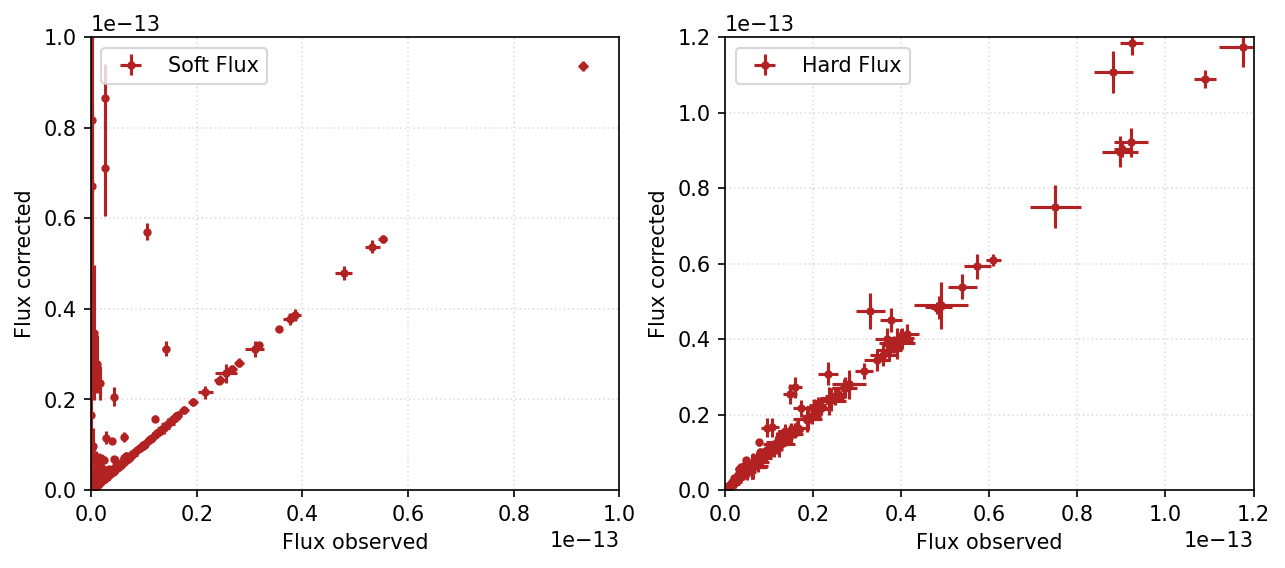

In [26]:
fig1 = plt.figure(figsize=(10, 4), dpi= 150)
sns.color_palette('dark')
ax1 = plt.subplot(121)
#ax1.scatter(chandra['SFlux'], soft_crr, s=5, color='firebrick', label='Soft Flux')
ax1.errorbar(chandra['SFlux'], soft_crr, xerr=chandra['SFlux_err'], yerr=soft_eru, fmt='.', color='firebrick', label='Soft Flux')


ax1.set_xlabel('Flux observed')
ax1.set_ylabel('Flux corrected')

ax1.set_ylim(0e-14,10e-14)
ax1.set_xlim(0e-14,10e-14)

ax2 = plt.subplot(122)
#ax2.scatter(chandra['HFlux'], hard_crr, s=5, color='firebrick', label='Hard Flux')
ax2.errorbar(chandra['HFlux'], hard_crr, xerr=chandra['HFlux_err'], yerr=hard_eru, fmt='.', color='firebrick', label='Hard Flux')


ax2.set_xlabel('Flux observed')
ax2.set_ylabel('Flux corrected')

ax2.set_ylim(0e-14,12e-14)
ax2.set_xlim(0e-14,12e-14)

ax1.legend()
ax2.legend()

ax1.grid(alpha=0.4, ls=':')
ax2.grid(alpha=0.4, ls=':')

plt.show()

In [27]:
chandra.replace_column('SFlux', soft_crr)
chandra.replace_column('SFlux_err', soft_eru)
chandra.replace_column('HFlux', hard_crr)
chandra.replace_column('HFlux_err', hard_eru)

In [28]:
chandra

ID,RA_C,DEC_C,Ctpflag,RA_X,DEC_X,PosErr,SFlux,SFlux_err,HFlux,HFlux_err,HR,HR_err,Phflag,Z_Spec,Z_Spec_er,Z_Spec_Ref,Z_Spec_Flag,E_bv,nuv_flux,nuv_fluxerr,fuv_flux,fuv_fluxerr,nuv_flag,fuv_flag,WISE-ID,W1,W1_err,W2,W2_err,W3,W3_err,W4,W4_err,N_2arcs,IR_index,SDSS_flag,U,U_err,G,G_err,R,R_err,I,I_err,Z,Z_err,NH_local,NH_intrinsec
str10,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float32,float32,int32,int32,float32,float64,float64,float64,float64,int32,int32,str19,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,uint8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
aegis_008,214.5951844,52.4524551,1,214.595307,52.452642,0.87,1.086e-15,1.517e-16,nan,-4.441e-16,-0.884,0.116,0,0.28085816,6.701488e-05,3,2,nan,nan,nan,nan,nan,-99,-99,J141822.80+522709.3,0.4413124863107728,0.012193914355420664,0.29065081416947497,0.009101776449475494,nan,-0.3670703847689031,nan,-2.502565438626691,1,0.0,4,0.00877404196072425,0.00261022489829853,0.06385579966084505,0.00129389402211133,0.2831390802039683,0.002347026470123802,0.472497722220833,0.003916678193369211,0.6332864848565157,0.012832124903169668,8.68725984285352e+19,1e+20
aegis_014,214.4401709,52.4672411,1,214.440073,52.467325,0.57,2.751e-15,4.604e-16,7.439e-15,1.206e-15,0.083,0.11,0,0.37115005,3.202341e-05,1,2,nan,nan,nan,nan,nan,-99,-99,,nan,nan,nan,nan,nan,nan,nan,nan,-99,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.61634662051778e+19,1e+22
aegis_017,214.455149,52.4698911,1,214.455007,52.469909,0.57,4.629e-15,4.258e-16,1.091e-14,1.238e-15,-0.144,0.07,0,0.99829185,6.538183e-05,1,2,nan,nan,nan,nan,nan,-99,-99,J141749.35+522810.8,0.031070340151702538,0.001717010411243377,0.03021146963852454,0.0028382307157125536,nan,nan,nan,nan,0,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.61634662051778e+19,1e+22
aegis_019,214.6097935,52.4717434,1,214.609871,52.471796,0.57,2.388e-15,1.821e-16,4.613e-15,6.651e-16,-0.364,0.069,0,0.6811534,0.00011532157,3,2,nan,nan,nan,nan,nan,-99,-99,,nan,nan,nan,nan,nan,nan,nan,nan,-99,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.68725984285352e+19,1e+20
aegis_020,214.502475,52.4725909,1,214.502601,52.472763,0.87,1.023e-15,4.543e-16,2.805e-15,7.06e-16,0.405,0.176,0,0.5320212,3.285639e-05,1,2,nan,nan,nan,nan,nan,-99,-99,J141800.43+522821.7,0.029130378656386492,0.0015561440302437346,0.04283233357394676,0.0028009527268135284,nan,nan,nan,nan,1,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.61634662051778e+19,5e+22
aegis_021,214.4243981,52.473085,1,214.424489,52.473226,0.57,1.575e-14,7.457e-16,3.855e-14,2.163e-15,-0.149,0.036,0,1.1481975,7.1470306e-05,1,2,0.007306395,0.0007590044736862184,0.00019898925721645357,nan,nan,1,256,J141741.87+522823.3,0.3813578689401782,0.004917410238842915,0.7745006882434268,0.0071334147976075245,2.535085428590973,0.11907989608700176,7.933519399257739,0.8256956639950805,2,-1.0,2,0.005802296865916459,0.0024262272395889194,0.004130472697936888,0.0008749903831113319,0.010139111719961104,0.0014101084525885961,0.03206268648598439,0.0021557502354807656,0.05510611942919274,0.007613192050345584,8.61634662051778e+19,1e+22
aegis_022,214.6263778,52.4776579,0,214.625989,52.478292,0.57,1.081e-15,1.904e-16,2.319e-15,6.271e-16,-0.104,0.158,0,1.9933912,0.00053132884,3,1,0.008551913,0.0009027374982833863,0.00029448625445365904,nan,nan,136,256,J141830.34+522839.4,0.03289185539404219,0.001484431361037831,0.03336872646994607,0.0028275034283173064,nan,-0.3390560274603369,nan,-2.253630362348582,1,-2.0,4,0.002948490283447263,0.0008934520998336346,0.004566676206954812,0.00036592757691209253,0.006570518461504049,0.0006051671235257486,0.006344543218510498,0.0009057487464475646,0.009196016280043648,0.0031592517778735135,8.68725984285352e+19,5e+22
aegis_026,214.6786783,52.4886204,1,214.678504,52.488777,0.57,3.791e-15,2.92e-16,5.14e-15,9.141e-16,-0.503,0.072,0,1.0829045,0.0011141767,3,1,0.008824984,0.0014861769676208496,2.888735942542553e-05,0.0

In [26]:
#!rm ./chandra_corr
#chandra.write('chandra_corr', format='fits')

## XMM Correction

In [29]:
xmm = xses[mask]

In [30]:
alfa=1.7
teo_HR_20,z = np.loadtxt(play+'xmm'+nh_all[0]+'.txt')
teo_HR_205  = np.loadtxt(play+'xmm'+nh_all[1]+'.txt')[0]
teo_HR_21   = np.loadtxt(play+'xmm'+nh_all[2]+'.txt')[0]
teo_HR_215  = np.loadtxt(play+'xmm'+nh_all[3]+'.txt')[0]
teo_HR_22   = np.loadtxt(play+'xmm'+nh_all[4]+'.txt')[0]
teo_HR_225  = np.loadtxt(play+'xmm'+nh_all[5]+'.txt')[0]
teo_HR_23   = np.loadtxt(play+'xmm'+nh_all[6]+'.txt')[0]
teo_HR_235  = np.loadtxt(play+'xmm'+nh_all[7]+'.txt')[0]
teo_HR_24   = np.loadtxt(play+'xmm'+nh_all[8]+'.txt')[0]
teo_HR_245  = np.loadtxt(play+'xmm'+nh_all[9]+'.txt')[0]
teo_HR_25   = np.loadtxt(play+'xmm'+nh_all[10]+'.txt')[0]

In [31]:
import scipy.spatial.distance
i = 0
result=[]
for line in xmm['Z_Spec']:
    point = np.array([(xmm['Z_Spec'][i],xmm['HR'][i])])
    aux = []
    for nh in nh_all:
        aux.append(scipy.spatial.distance.cdist(point,np.column_stack((z, vars()[nh]))).min(axis=1))    
    aux=np.array(aux)
    result.append(nh_nro[aux.argmin()])
    i+=1

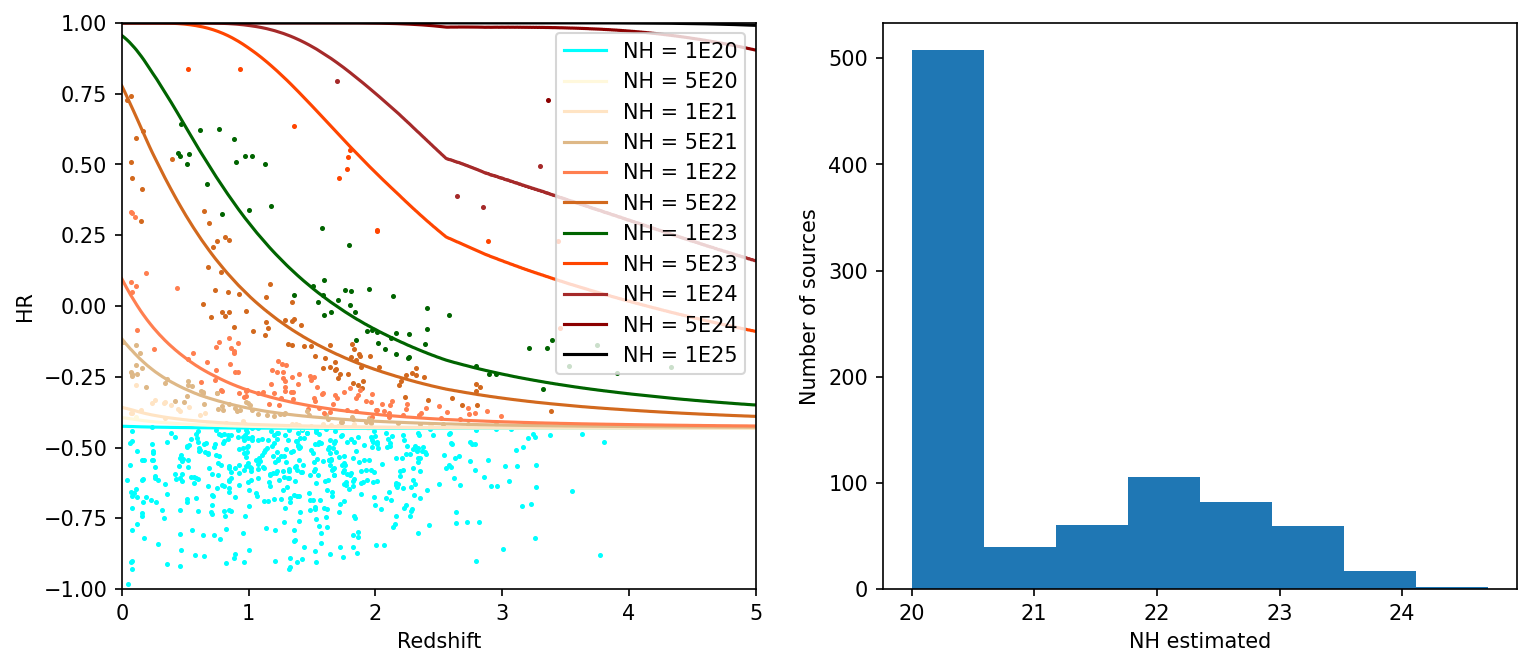

In [32]:
fig1 = plt.figure(figsize=(12, 5), dpi= 150)
sns.color_palette('dark')
ax1 = plt.subplot(121)
ax1.plot(z, teo_HR_20, label='NH = 1E20', color='cyan')
ax1.plot(z, teo_HR_205, label='NH = 5E20', color='cornsilk')
ax1.plot(z, teo_HR_21, label='NH = 1E21', color='bisque')
ax1.plot(z, teo_HR_215, label='NH = 5E21', color='burlywood')
ax1.plot(z, teo_HR_22, label='NH = 1E22', color='coral')
ax1.plot(z, teo_HR_225, label='NH = 5E22', color='chocolate')
ax1.plot(z, teo_HR_23, label='NH = 1E23', color='darkgreen')
ax1.plot(z, teo_HR_235, label='NH = 5E23', color='orangered')
ax1.plot(z, teo_HR_24, label='NH = 1E24', color='brown')
ax1.plot(z, teo_HR_245, label='NH = 5E24', color='darkred')
ax1.plot(z, teo_HR_25, label='NH = 1E25', color='black')

i=0
for line in result:
    if line==1E20:
        ax1.scatter(xmm['Z_Spec'][i], xmm['HR'][i], s=2, color='cyan')
    elif line==5E20:
        ax1.scatter(xmm['Z_Spec'][i], xmm['HR'][i], s=2, color='cornsilk')
    elif line==1E21:
        ax1.scatter(xmm['Z_Spec'][i], xmm['HR'][i], s=2, color='bisque')
    elif line==5E21:
        ax1.scatter(xmm['Z_Spec'][i], xmm['HR'][i], s=2, color='burlywood')
    elif line==1E22:
        ax1.scatter(xmm['Z_Spec'][i], xmm['HR'][i], s=2, color='coral')
    elif line==5E22:
        ax1.scatter(xmm['Z_Spec'][i], xmm['HR'][i], s=2, color='chocolate')
    elif line==1E23:
        ax1.scatter(xmm['Z_Spec'][i], xmm['HR'][i], s=2, color='darkgreen')
    elif line==5E23:
        ax1.scatter(xmm['Z_Spec'][i], xmm['HR'][i], s=2, color='orangered')
    elif line==1E24:
        ax1.scatter(xmm['Z_Spec'][i], xmm['HR'][i], s=2, color='brown')
    elif line==5E24:
        ax1.scatter(xmm['Z_Spec'][i], xmm['HR'][i], s=2, color='darkred')
    elif line==1E25:
        ax1.scatter(xmm['Z_Spec'][i], xmm['HR'][i], s=2, color='black')
    else:
        ax1.scatter(xmm['Z_Spec'][i], xmm['HR'][i], s=2, color='yellow')
    i+=1

ax1.set_xlabel('Redshift')
ax1.set_ylabel('HR')
ax1.set_ylim(-1,1)
ax1.set_xlim(0,5)

ax1.legend()

ax1 = plt.subplot(122)
ax1.hist(np.log10(result), bins=8)
ax1.set_xlabel('NH estimated')
ax1.set_ylabel('Number of sources')
plt.show()

plt.show()

In [33]:
#Correction

In [34]:
xmm.add_column(result, name='NH_intrinsec')

In [35]:
xmm

ID,RA_C,DEC_C,Ctpflag,RA_X,DEC_X,PosErr,SFlux,SFlux_err,HFlux,HFlux_err,HR,HR_err,Phflag,Z_Spec,Z_Spec_er,Z_Spec_Ref,Z_Spec_Flag,E_bv,nuv_flux,nuv_fluxerr,fuv_flux,fuv_fluxerr,nuv_flag,fuv_flag,WISE-ID,W1,W1_err,W2,W2_err,W3,W3_err,W4,W4_err,N_2arcs,IR_index,SDSS_flag,U,U_err,G,G_err,R,R_err,I,I_err,Z,Z_err,NH_local,NH_intrinsec
str10,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float32,float32,int32,int32,float32,float64,float64,float64,float64,int32,int32,str19,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,uint8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
xmmrm_0014,212.2646279,52.0518961,1,212.2631948,52.0518633,2.4,nan,-1.7e-15,1.828279959066939e-14,1.199540023110986e-14,0.552592,nan,-99,1.7988228,0.00073348574,3,2,nan,nan,nan,nan,nan,-99,-99,J140903.53+520306.9,0.03616501325463738,0.0016654604329784963,0.055633931830828584,0.003228166976798653,0.27031575165417865,0.09336375302405885,nan,-1.4577480680991275,1,-2.0,4,0.0149141941544723,0.001359911557541809,0.014886747946081589,0.00047989205669642907,0.013982997524352204,0.0006825772750246644,0.022222843179630886,0.0009619957307323505,0.026472808516311393,0.00387679473828394,1.12404278772285e+20,5e+23
xmmrm_0040,213.5667592,52.0109815,1,213.5663924,52.0089653,2.78,nan,-1.7e-15,6.713039768301921e-15,6.0152900252540865e-15,0.136941,nan,-99,0.68139446,0.00033880878,3,1,nan,nan,nan,nan,nan,-99,-99,J141416.02+520039.5,0.07189322763509413,0.0019202671259265984,0.046659383600205134,0.002879317061902172,0.18718510449277145,0.08930519674293377,nan,-2.4059285446621335,1,-2.0,4,0.003118889803256192,0.001444919704804594,0.004643014921097868,0.0006115216217371813,0.006848566393820229,0.0010281653448095597,0.019072175659409014,0.0016687816589036752,0.01982441350946803,0.0057698315022150955,1.30616519006022e+20,5e+22
xmmrm_0048,213.1863736,52.6307218,1,213.1854097,52.62996,4.21,nan,-1.7e-15,1.3130299866587376e-14,4.8649400853021784e-15,0.634771,nan,-99,1.3554541,0.0007951138,3,2,0.009237546,0.0031467852592468263,0.00034353193640708924,0.0015214766263961792,0.0004139672517776489,1,1,J141244.72+523750.5,0.06621138963654599,0.001951454284862301,0.07506232820862693,0.003111073287237936,0.1872374816635875,0.09019244530857135,nan,-1.7260987671239252,1,-1.0,4,0.011673477655333555,0.0013869653895837773,0.013206878148477996,0.0005108873337067425,0.016292947732554325,0.000795337040290396,0.017897820179359925,0.0012363376673901088,0.019391003321996624,0.004161327276435249,1.01012775358572e+20,5e+23
xmmrm_0068,214.0074859,53.3755,1,214.0079316,53.3756851,1.97,nan,-1.7e-15,8.798679253447291e-15,5.170999770682996e-15,0.335628,nan,-99,0.6486943,0.00011900544,3,2,0.010860762,0.00046651050448417666,0.00020581336319446563,nan,nan,256,1,J141601.79+532231.7,0.10268059974545193,0.0022697358755395572,0.08600806987056436,0.0030894380968964187,nan,-0.3666667123705241,nan,-2.1661204207106732,1,-2.0,4,0.0019769682509092165,0.0009523071943857883,0.0007277792419905263,0.0003485609030032234,0.00661911872408816,0.0007010898814489374,0.01728224261561384,0.0009709695658840679,0.024774210131129206,0.0032401405961988393,1.00013794277947e+20,5e+22
xmmrm_0091,213.1070244,52.1815707,1,213.1081198,52.1811519,3.89,nan,-1.7e-15,1.1018899144900687e-14,1.0632799504685549e-14,0.209575,nan,-99,0.71764064,0.0002632202,3,2,nan,nan,nan,nan,nan,-99,-99,J141225.71+521053.8,0.2092888287419291,0.005590101750566397,0.1335892768036881,0.0046755301454084975,nan,-0.20756281621068573,nan,-1.819640336574056,1,0.0,4,0.004777489795186949,0.0020329066442969653,0.0008158303996031566,0.0007491533281500384,0.008340651036339571,0.001505676566005793,0.033604709580692574,0.0024760864513718554,0.08503546632120822,0.00869358214447776,1.4773395352175e+20,5e+22
xmmrm_0109,213.6774298,52.0080353,1,213.6793622,52.0093481,3.23,nan,-1.7e-15,nan,-9.2e-15,0.507522,nan,-99,0.07556752,9.9897925e-06,3,2,nan,nan,nan,nan,nan,-99,-99

In [36]:
def corr_chandra(alfa,NH_int,z,NH_gal,i_flux,band):
    line = str(alfa)+" "+str(NH_int)+" "+str(z)+" "+str(NH_gal)+" "+str(i_flux)+" "+str(band)
    outputString=!flux_correction {line}
    outputS=float(outputString[0])
    return outputS

In [37]:
soft_band="0.5-2"
hard_band="2-10"
corr_chandra(1.7,1e20,0.2,1e22,1,hard_band)

1.059

In [38]:
i=0
soft_crr=[]
soft_eru=[]
hard_crr=[]
hard_eru=[]
#XMM-RM catalog has flux corrected by local absortion
nh_local=0

for line in xmm:
    if np.isnan(xmm['SFlux'][i])==True:
        soft_crr.append(np.NaN) 
    else:
        soft_crr.append(np.float(corr_chandra(alfa,xmm['NH_intrinsec'][i],xmm['Z_Spec'][i],nh_local,xmm['SFlux'][i],soft_band)))
    if np.isnan(xmm['HFlux'][i])==True:  
        hard_crr.append(np.NaN)
    else:
        hard_crr.append(np.float(corr_chandra(alfa,xmm['NH_intrinsec'][i],xmm['Z_Spec'][i],nh_local,xmm['HFlux'][i],hard_band)))
    if np.isnan(xmm['SFlux_err'][i])==True:  
        soft_eru.append(np.NaN)
    elif xmm['SFlux_err'][i]<0:
        soft_eru.append(-np.float(corr_chandra(alfa,xmm['NH_intrinsec'][i],xmm['Z_Spec'][i],nh_local,abs(xmm['SFlux_err'][i]),soft_band)))        
    else:
        soft_eru.append(np.float(corr_chandra(alfa,xmm['NH_intrinsec'][i],xmm['Z_Spec'][i],nh_local,xmm['SFlux_err'][i],soft_band)))
        
    if np.isnan(xmm['HFlux_err'][i])==True:  
        hard_eru.append(np.NaN)
    elif xmm['HFlux_err'][i]<0:
        hard_eru.append(-np.float(corr_chandra(alfa,xmm['NH_intrinsec'][i],xmm['Z_Spec'][i],nh_local,abs(xmm['HFlux_err'][i]),hard_band)))
    else:
        hard_eru.append(np.float(corr_chandra(alfa,xmm['NH_intrinsec'][i],xmm['Z_Spec'][i],nh_local,xmm['HFlux_err'][i],hard_band)))
    i+=1

In [39]:
soft_crr = np.array(soft_crr)
soft_eru = np.array(soft_eru)
hard_crr = np.array(hard_crr)
hard_eru = np.array(hard_eru)

#soft_eru = np.where(soft_eru == "", np.NaN, soft_eru)
#hard_eru = np.where(hard_eru == "", np.NaN, hard_eru)

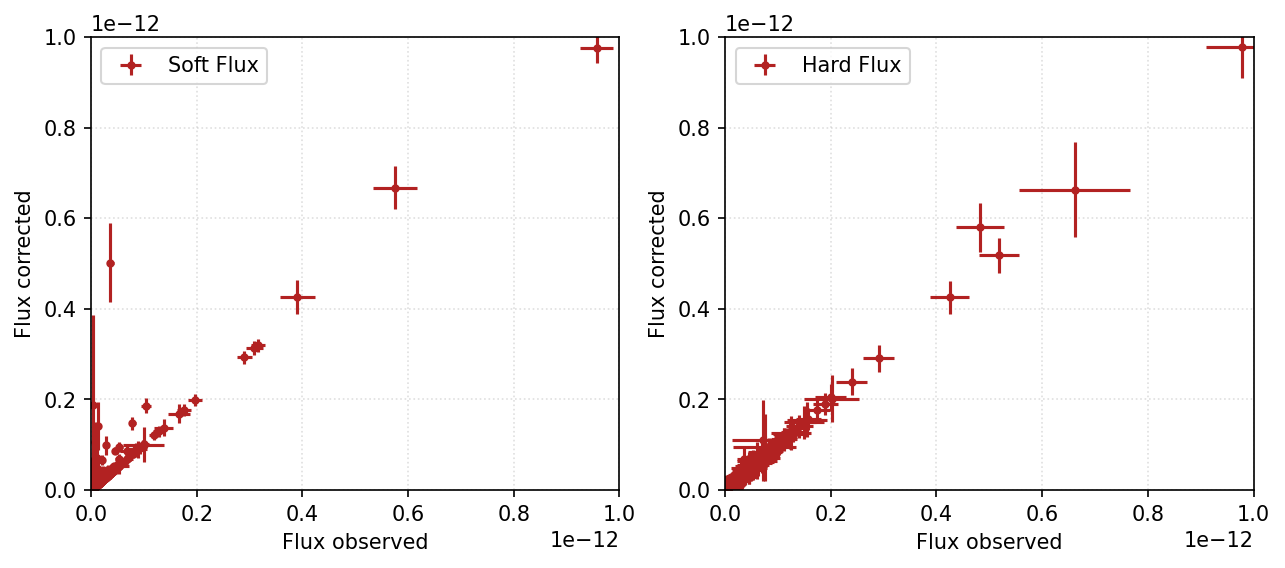

In [40]:
fig1 = plt.figure(figsize=(10, 4), dpi= 150)
sns.color_palette('dark')
ax1 = plt.subplot(121)
#ax1.scatter(chandra['SFlux'], soft_crr, s=5, color='firebrick', label='Soft Flux')
ax1.errorbar(xmm['SFlux'], soft_crr, xerr=xmm['SFlux_err'] ,yerr=soft_eru, fmt='.', color='firebrick', label='Soft Flux')


ax1.set_xlabel('Flux observed')
ax1.set_ylabel('Flux corrected')

ax1.set_ylim(0e-14,1e-12)
ax1.set_xlim(0e-14,1e-12)

ax2 = plt.subplot(122)
#ax2.scatter(chandra['HFlux'], hard_crr, s=5, color='firebrick', label='Hard Flux')
ax2.errorbar(xmm['HFlux'], hard_crr, xerr=xmm['HFlux_err'] ,yerr=hard_eru, fmt='.', color='firebrick', label='Hard Flux')


ax2.set_xlabel('Flux observed')
ax2.set_ylabel('Flux corrected')

ax2.set_ylim(0e-14,1e-12)
ax2.set_xlim(0e-14,1e-12)

ax1.legend()
ax2.legend()

ax1.grid(alpha=0.4, ls=':')
ax2.grid(alpha=0.4, ls=':')

plt.show()

In [41]:
xmm.replace_column('SFlux', soft_crr)
xmm.replace_column('SFlux_err', soft_eru)
xmm.replace_column('HFlux', hard_crr)
xmm.replace_column('HFlux_err', hard_eru)

In [42]:
xmm

ID,RA_C,DEC_C,Ctpflag,RA_X,DEC_X,PosErr,SFlux,SFlux_err,HFlux,HFlux_err,HR,HR_err,Phflag,Z_Spec,Z_Spec_er,Z_Spec_Ref,Z_Spec_Flag,E_bv,nuv_flux,nuv_fluxerr,fuv_flux,fuv_fluxerr,nuv_flag,fuv_flag,WISE-ID,W1,W1_err,W2,W2_err,W3,W3_err,W4,W4_err,N_2arcs,IR_index,SDSS_flag,U,U_err,G,G_err,R,R_err,I,I_err,Z,Z_err,NH_local,NH_intrinsec
str10,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float32,float32,int32,int32,float32,float64,float64,float64,float64,int32,int32,str19,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,uint8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
xmmrm_0014,212.2646279,52.0518961,1,212.2631948,52.0518633,2.4,nan,-2.088e-14,2.294e-14,1.505e-14,0.552592,nan,-99,1.7988228,0.00073348574,3,2,nan,nan,nan,nan,nan,-99,-99,J140903.53+520306.9,0.03616501325463738,0.0016654604329784963,0.055633931830828584,0.003228166976798653,0.27031575165417865,0.09336375302405885,nan,-1.4577480680991275,1,-2.0,4,0.0149141941544723,0.001359911557541809,0.014886747946081589,0.00047989205669642907,0.013982997524352204,0.0006825772750246644,0.022222843179630886,0.0009619957307323505,0.026472808516311393,0.00387679473828394,1.12404278772285e+20,5e+23
xmmrm_0040,213.5667592,52.0109815,1,213.5663924,52.0089653,2.78,nan,-7.246e-15,7.241e-15,6.488e-15,0.136941,nan,-99,0.68139446,0.00033880878,3,1,nan,nan,nan,nan,nan,-99,-99,J141416.02+520039.5,0.07189322763509413,0.0019202671259265984,0.046659383600205134,0.002879317061902172,0.18718510449277145,0.08930519674293377,nan,-2.4059285446621335,1,-2.0,4,0.003118889803256192,0.001444919704804594,0.004643014921097868,0.0006115216217371813,0.006848566393820229,0.0010281653448095597,0.019072175659409014,0.0016687816589036752,0.01982441350946803,0.0057698315022150955,1.30616519006022e+20,5e+22
xmmrm_0048,213.1863736,52.6307218,1,213.1854097,52.62996,4.21,nan,-5.018e-14,1.793e-14,6.644e-15,0.634771,nan,-99,1.3554541,0.0007951138,3,2,0.009237546,0.0031467852592468263,0.00034353193640708924,0.0015214766263961792,0.0004139672517776489,1,1,J141244.72+523750.5,0.06621138963654599,0.001951454284862301,0.07506232820862693,0.003111073287237936,0.1872374816635875,0.09019244530857135,nan,-1.7260987671239252,1,-1.0,4,0.011673477655333555,0.0013869653895837773,0.013206878148477996,0.0005108873337067425,0.016292947732554325,0.000795337040290396,0.017897820179359925,0.0012363376673901088,0.019391003321996624,0.004161327276435249,1.01012775358572e+20,5e+23
xmmrm_0068,214.0074859,53.3755,1,214.0079316,53.3756851,1.97,nan,-7.587e-15,9.524e-15,5.598e-15,0.335628,nan,-99,0.6486943,0.00011900544,3,2,0.010860762,0.00046651050448417666,0.00020581336319446563,nan,nan,256,1,J141601.79+532231.7,0.10268059974545193,0.0022697358755395572,0.08600806987056436,0.0030894380968964187,nan,-0.3666667123705241,nan,-2.1661204207106732,1,-2.0,4,0.0019769682509092165,0.0009523071943857883,0.0007277792419905263,0.0003485609030032234,0.00661911872408816,0.0007010898814489374,0.01728224261561384,0.0009709695658840679,0.024774210131129206,0.0032401405961988393,1.00013794277947e+20,5e+22
xmmrm_0091,213.1070244,52.1815707,1,213.1081198,52.1811519,3.89,nan,-6.904e-15,1.184e-14,1.143e-14,0.209575,nan,-99,0.71764064,0.0002632202,3,2,nan,nan,nan,nan,nan,-99,-99,J141225.71+521053.8,0.2092888287419291,0.005590101750566397,0.1335892768036881,0.0046755301454084975,nan,-0.20756281621068573,nan,-1.819640336574056,1,0.0,4,0.004777489795186949,0.0020329066442969653,0.0008158303996031566,0.0007491533281500384,0.008340651036339571,0.001505676566005793,0.033604709580692574,0.0024760864513718554,0.08503546632120822,0.00869358214447776,1.4773395352175e+20,5e+22
xmmrm_0109,213.6774298,52.0080353,1,213.6793622,52.0093481,3.23,nan,-3.258e-14,nan,-1.136e-14,0.507522,nan,-99,0.07556752,9.9897925e-06,3,2,nan,nan,nan,nan,nan,-99,-99,J141442.60+520028.2,0.1933509240601468,0.003205489941304836,0.11571017324808017,0.0030906171434024903,nan,nan,

In [43]:
from astropy.table import vstack
xses= vstack([chandra, xmm], join_type='exact')

In [44]:
from astropy import units as u

xses['RA_X']=xses['RA_X']*u.deg
xses['DEC_X']=xses['DEC_X']*u.deg
xses['PosErr']=xses['PosErr']*u.arcsec
xses['RA_C']=xses['RA_C']*u.deg
xses['DEC_C']=xses['DEC_C']*u.deg
xses['SFlux']=xses['SFlux']* u.erg / u.cm**2 / u.s
xses['SFlux_err']=xses['SFlux_err']* u.erg / u.cm**2 / u.s
xses['HFlux']=xses['HFlux']* u.erg / u.cm**2 / u.s
xses['HFlux_err']=xses['HFlux_err']* u.erg / u.cm**2 / u.s

xses['nuv_flux']=xses['nuv_flux'] * u.mJy
xses['nuv_fluxerr']=xses['nuv_fluxerr'] * u.mJy
xses['fuv_flux']=xses['fuv_flux'] * u.mJy

xses['fuv_fluxerr']=xses['fuv_fluxerr'] * u.mJy

xses['W1']=xses['W1'] * u.mJy

xses['W1_err']=xses['W1_err'] * u.mJy

xses['W2']=xses['W2'] * u.mJy
xses['W2_err']=xses['W2_err'] * u.mJy
xses['W3']=xses['W3'] * u.mJy

xses['W3_err']=xses['W3_err'] * u.mJy

xses['W4']=xses['W4'] * u.mJy
xses['W4_err']=xses['W4_err'] * u.mJy

xses['U']=xses['U'] * u.mJy
xses['U_err']=xses['U_err'] * u.mJy
xses['G']=xses['G'] * u.mJy
xses['G_err']=xses['G_err'] * u.mJy
xses['R']=xses['R'] * u.mJy
xses['R_err']=xses['R_err'] * u.mJy
xses['I']=xses['I'] * u.mJy
xses['I_err']=xses['I_err'] * u.mJy
xses['Z']=xses['Z'] * u.mJy
xses['Z_err']=xses['Z_err'] * u.mJy

In [45]:
#!rm ./chandra_corr
xses.write(deli+'Xses_z_xcorr', format='fits', overwrite=True)